In [101]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

import datetime
import matplotlib.dates as mdates
from datetime import datetime, timedelta

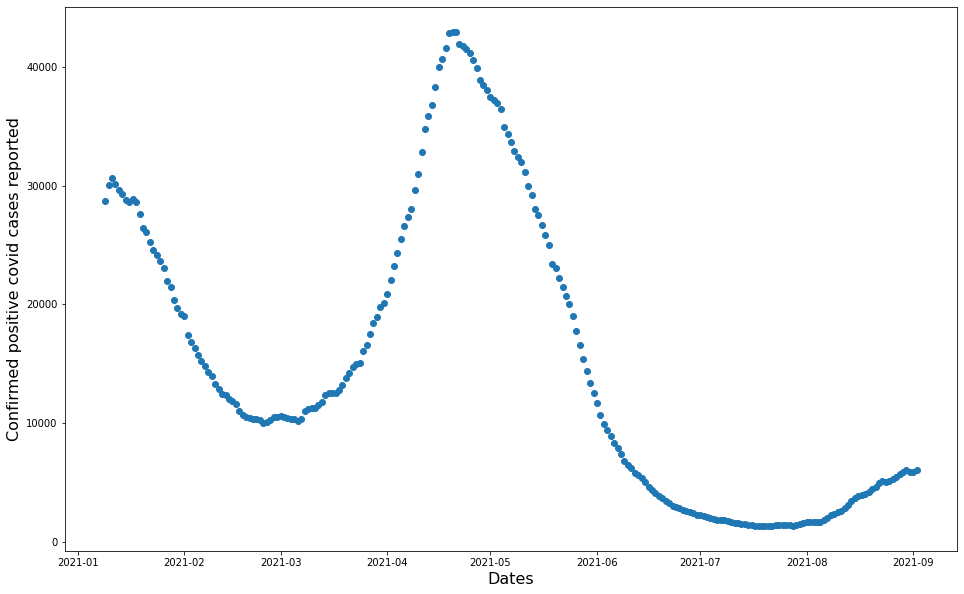

In [127]:
covid_cases = pd.read_csv('covidtesting.csv')

#print(covid_cases.columns)

dates = covid_cases[['Reported Date', 'Confirmed Positive'] ] [338:575]

#print(np.shape(dates))
dates_array = np.array(dates['Reported Date'], dtype = np.datetime64)


caes = np.array(dates['Confirmed Positive'])

#print(dates_array)
#print(caes)

plt.plot_date(dates_array, caes)
plt.xlabel("Dates")
plt.ylabel("Confirmed positive covid cases reported")
plt.show()

Text(0, 0.5, 'Total first doses administered')

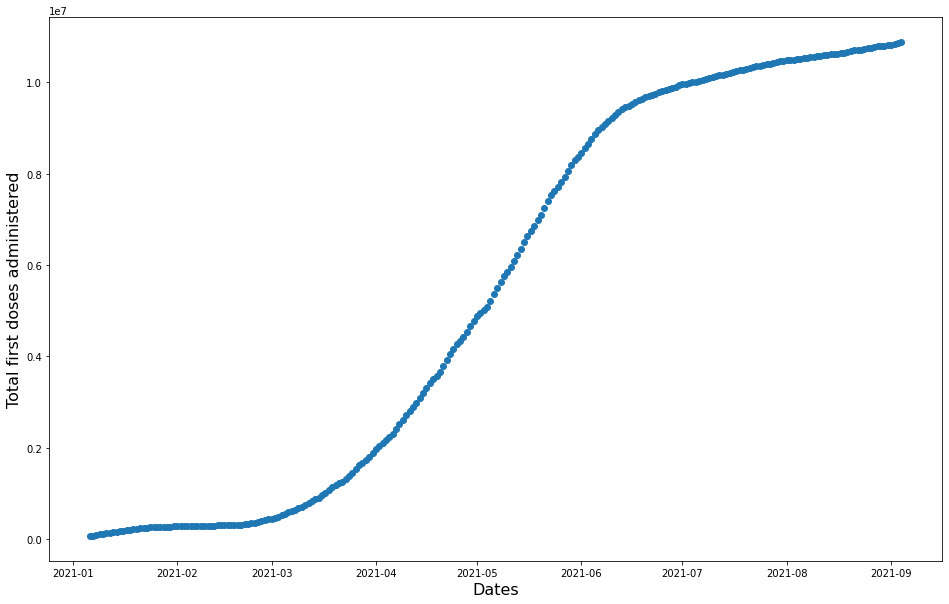

In [124]:
vaccine_data = pd.read_csv('vaccine_doses.csv')

vaccine_data_time = vaccine_data[1: 250]

vaccine_dates = vaccine_data_time['report_date']

vaccine_datess = np.array(vaccine_dates, dtype = np.datetime64)

first_vaccine_doses = vaccine_data_time['total_individuals_at_least_one']

plt.plot_date(vaccine_datess, first_vaccine_doses)
plt.xlabel('Dates')
plt.ylabel('Total first doses administered')

Text(0.5, 0, 'Dates')

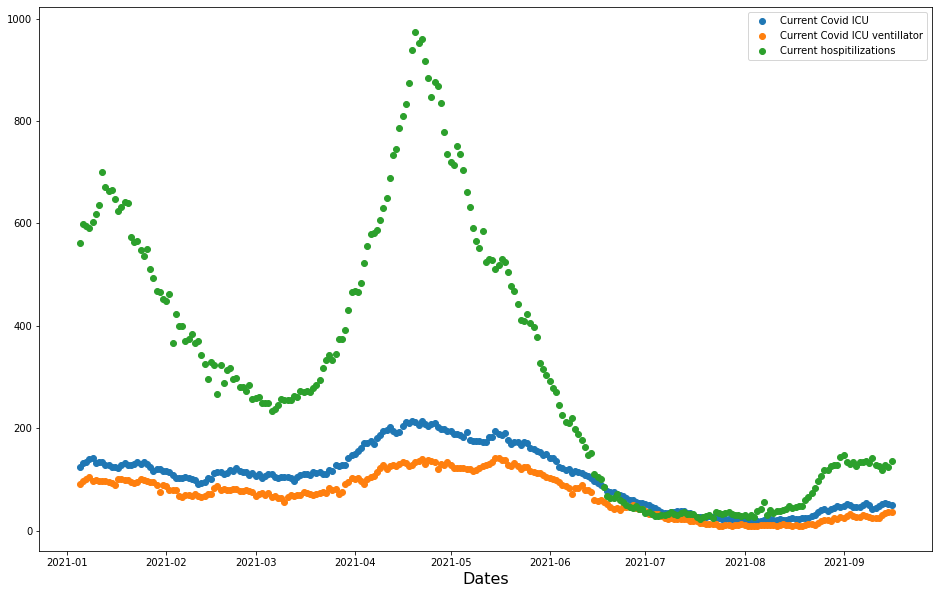

In [126]:
icu_data = pd.read_csv('region_hospital_icu_covid_data.csv')
icu_time_data = icu_data[277:532]

icu_dates = icu_time_data['date']
icu_plot_date = np.array(icu_dates, dtype = np.datetime64)

icu_current_covid = icu_time_data['icu_current_covid']
icu_current_covid_vent = icu_time_data['icu_current_covid_vented']
icu_current_hospitilizations = icu_time_data['hospitalizations']

plt.figure()
plt.plot_date(icu_plot_date, icu_current_covid, label = 'Current Covid ICU')
plt.plot_date(icu_plot_date, icu_current_covid_vent, label = 'Current Covid ICU ventillator')
plt.plot_date(icu_plot_date, icu_current_hospitilizations, label = 'Current hospitilizations')
plt.legend()
plt.xlabel('Dates')

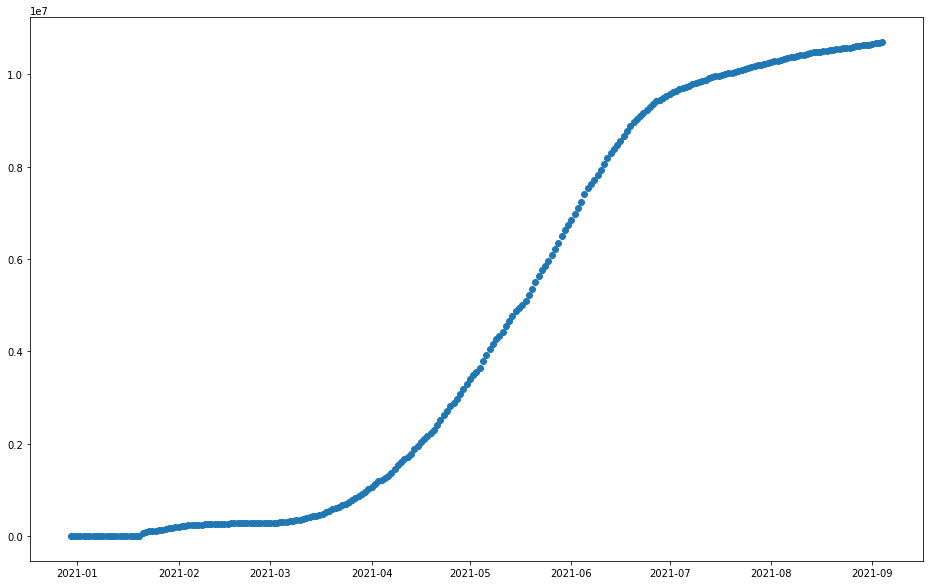

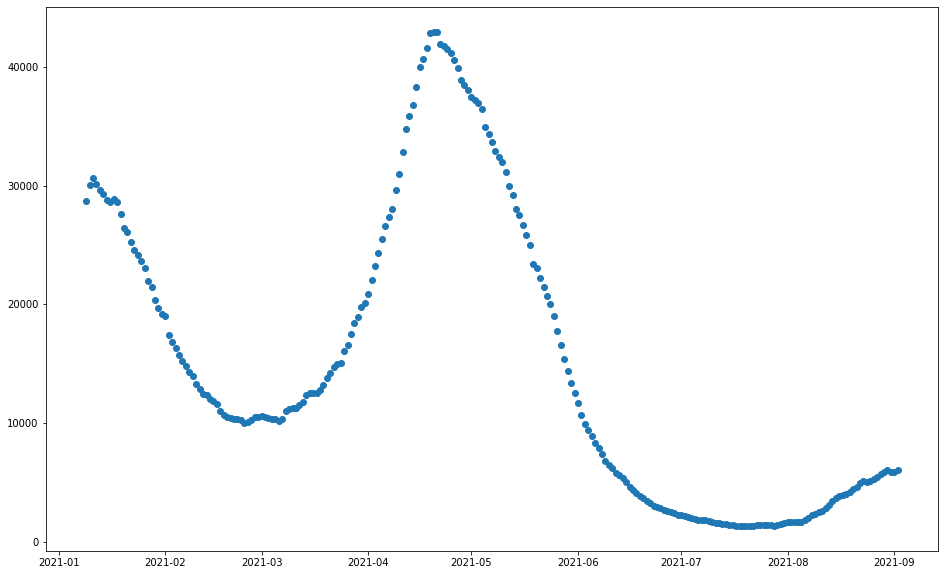

In [153]:
vaccine_data_preshift = pd.read_csv('vaccine_doses.csv')
vaccine_pre_shift_dates = vaccine_data_preshift['report_date']
vaccine_preshift_dates_plot = np.array(vaccine_pre_shift_dates, dtype = np.datetime64)
vaccine_first_dose_preshift = vaccine_data_preshift['total_individuals_at_least_one']

#plt.plot_date(vaccine_preshift_dates_plot, vaccine_first_dose_preshift)

vaccine_preshift_array = np.array(vaccine_first_dose_preshift)
vaccine_shift = np.roll(vaccine_preshift_array, 14)
vaccine_shift[0: 23] = 0 #First dose first given on 6th (data point 9, so for first 9+14 days, noone had first dose)
                         #for at least 14 days

dates_restricted = vaccine_preshift_dates_plot[1: 250]
first_dose_restricted = vaccine_shift[1:250]

plt.figure()
plt.plot_date(dates_restricted, first_dose_restricted)
plt.figure()
plt.plot_date(dates_array, caes)